In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/My\ Drive/archive.zip > /dev/null

In [2]:
pip install keras

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [4]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4848 sha256=536dfb3b96b51d3ec6aa4b45984095adb113f1ab0c0155640f9c99f41d8b0860
  Stored in directory: c:\users\ai\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array 
from tensorflow.keras.applications.vgg19 import VGG19,preprocess_input,decode_predictions

In [14]:
len(os.listdir("C:/Users/AI/project_IoT/sansevaria/train"))

2

In [15]:
train_datagen = ImageDataGenerator(zoom_range= 0.5, 
                                   horizontal_flip= True,
                                   rotation_range=True, 
                                   preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [23]:
train = train_datagen.flow_from_directory(directory="C:/Users/AI/project_IoT/sansevaria/train",
                                          target_size= (224, 224),
                                          batch_size=15,
                                          class_mode="binary")

val = val_datagen.flow_from_directory(directory="C:/Users/AI/project_IoT/sansevaria/valid",
                                      target_size= (224, 224),
                                      batch_size=15,
                                      class_mode="binary")

Found 1211 images belonging to 2 classes.
Found 253 images belonging to 2 classes.


Building the Model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications.vgg19 import VGG19
import keras

In [18]:
base_model = VGG19(input_shape=(224, 224, 3), include_top=False)

In [19]:
model = Sequential()
model.add(base_model)
model.add(Flatten())

model.add(Dense(16, activation="relu"))
#model.add(Dropout(0.3))
#model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 16)                401424    
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 20,425,825
Trainable params: 20,425,825
Non-trainable params: 0
_________________________________________________________________


In [20]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
es = EarlyStopping (monitor= 'val_accuracy', min_delta= 0.01, patience= 3, verbose=1)
mc = ModelCheckpoint (filepath="best_model.h5",monitor= 'val_accuracy', min_delta= 0.01, 
                      patience= 3, verbose=1, save_best_only= True) 
cb = [es, mc]

In [21]:
model.compile(optimizer= 'adam', loss= "binary_crossentropy", metrics= ['accuracy'])

In [24]:
m = model.fit_generator(train,
                        epochs= 20,
                        callbacks= cb,
                        validation_data= val)

C:\Users\AI\AppData\Local\Temp\ipykernel_3076\2907930993.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  m = model.fit_generator(train,


Epoch 1/20
81/81 [==============================] - ETA: 0s - loss: 0.9063 - accuracy: 0.6705
Epoch 1: val_accuracy improved from -inf to 0.56126, saving model to best_model.h5
81/81 [==============================] - 545s 7s/step - loss: 0.9063 - accuracy: 0.6705 - val_loss: 0.5137 - val_accuracy: 0.5613
Epoch 2/20
81/81 [==============================] - ETA: 0s - loss: 0.5885 - accuracy: 0.6920
Epoch 2: val_accuracy did not improve from 0.56126
81/81 [==============================] - 1120s 14s/step - loss: 0.5885 - accuracy: 0.6920 - val_loss: 0.6914 - val_accuracy: 0.5613
Epoch 3/20
81/81 [==============================] - ETA: 0s - loss: 0.5349 - accuracy: 0.6920
Epoch 3: val_accuracy did not improve from 0.56126
81/81 [==============================] - 541s 7s/step - loss: 0.5349 - accuracy: 0.6920 - val_loss: 0.4880 - val_accuracy: 0.5613
Epoch 4/20
81/81 [==============================] - ETA: 0s - loss: 0.4527 - accuracy: 0.6920
Epoch 4: val_accuracy did not improve from 0.56

In [25]:
h=m.history 
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

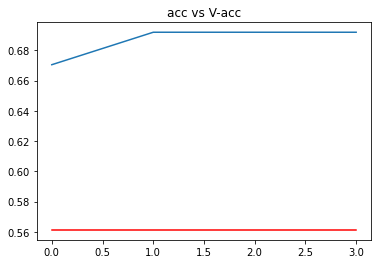

In [26]:
plt.plot(h['accuracy']) 
plt.plot(h['val_accuracy'], c="red") 
plt.title("acc vs V-acc") 
plt.show()

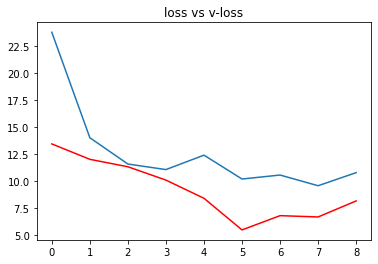

In [ ]:
plt.plot(h['loss']) 
plt.plot(h['val_loss'], c="red") 
plt.title("loss vs v-loss") 
plt.show()

In [ ]:
from keras.models import load_model

model =load_model("/content/best_model.h5")


In [ ]:
acc=model.evaluate(val)[1]

print(f"The accuracy of your model is = {acc*100} %")   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


The accuracy of your model is = 82.10790157318115 %
